In [1]:
import tensorflow as tf
import tensorflow.contrib.slimm as slim

import matplotlib.pyplot as plt
import numpy as np
import json
from PIL import Image, ImageDraw

%matplotlib inline



# Generator
input: [batch_size, image_height, image_width, channel]
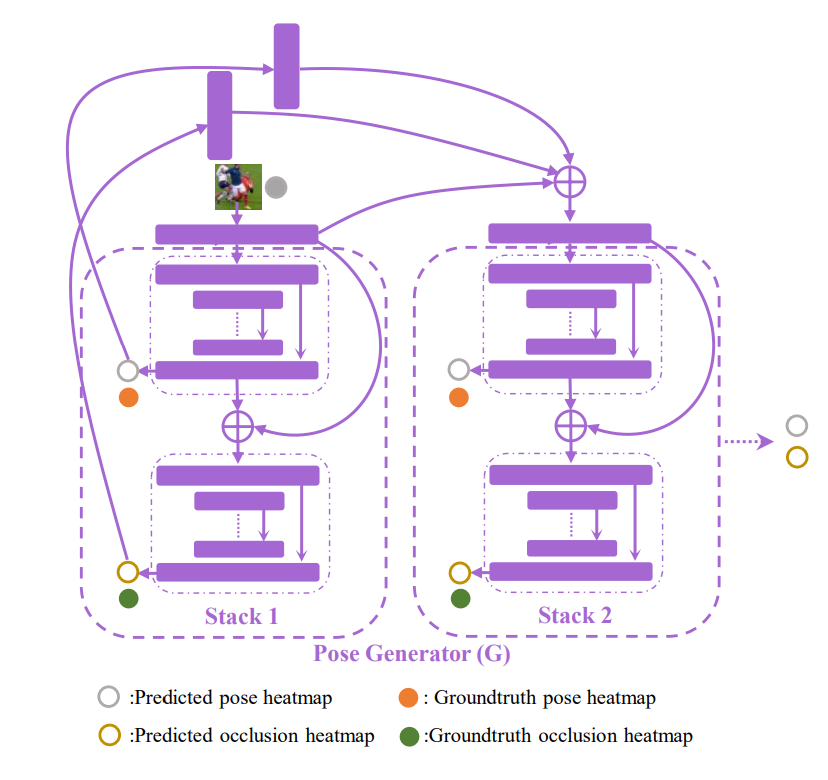

In [ ]:
class Generator:
    def __init__(self, batch_size, image_shape, stack_size=2, module_size=2, channel_size=32):
        self.batch_size = batch_size
        self.image_shape = image_shape
        self.stack_size = stack_size
        self.module_size = module_size
        self.channel_size = channel_size
        self.alpha = 0.2
        with tf.variable_scope("generator"):
            self.inputs = tf.placeholder(tf.float32, shape=[None, *image_shape], name="inputs")
    
    def leaky_relu(self, inputs):
        return tf.maximum(inputs, inputs * self.alpha)
    
    def kinit(size, dtype, partition_info):
        return tf.random_normal(size, stddev=0.02)
    
    def build_stack(self, inputs):

        conv_layer = slim.conv2d(inputs, self.channel_size, 3)
        self.build_module(conv_layer, self.channel_size)
        pass
    
    def build_module(self, inputs, channel_size):
        return self.build_conv_pair(self.module_size, inputs, channel_size)
    
    def build_conv_pair(self, depth, inputs, channels):
        if depth > 0:
            conv_layer = slim.conv2d(inputs, channels, 3, stride=2, padding="SAME")
            out_layer = self.build_conv_pair(depth - 1, conv_layer, channels/2)
            concat_layer = tf.concat([conv_layer, out_layer], axis=-1)
            return slim.conv2d_transpose(concat_layer, channels, 3, stride=2, padding="SAME")
            
        else:
            return inputs